In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df0 = pd.read_excel('Macrodata2.xlsx')

In [28]:
df0

,Date,Trade Balance,FDI (Bil USD),Tariff rates(%)
0,1988-12-31,-4.853123,-1.508575,3.59
1,1989-12-31,-8.627128,5.173426,3.77
2,1990-12-31,-3.400093,2.556703,4.80
3,1991-12-31,-9.112552,4.741535,4.50
4,1992-12-31,-10.688791,-2.137728,4.18
5,1993-12-31,1.038684,0.479814,3.79
6,1994-12-31,3.606123,7.517249,4.16
7,1995-12-31,10.519995,12.041505,6.28
8,1996-12-31,17.841175,15.591798,4.40
9,1997-12-31,23.842770,18.638444,3.66


In [29]:
df0.head()

,Date,Trade Balance,FDI (Bil USD),Tariff rates(%)
0,1988-12-31,-4.853123,-1.508575,3.59
1,1989-12-31,-8.627128,5.173426,3.77
2,1990-12-31,-3.400093,2.556703,4.80
3,1991-12-31,-9.112552,4.741535,4.50
4,1992-12-31,-10.688791,-2.137728,4.18


In [30]:
df1 = df0.drop("Date", axis=1)

In [31]:
df1.head()

,Trade Balance,FDI (Bil USD),Tariff rates(%)
0,-4.853123,-1.508575,3.59
1,-8.627128,5.173426,3.77
2,-3.400093,2.556703,4.80
3,-9.112552,4.741535,4.50
4,-10.688791,-2.137728,4.18


In [32]:
import statsmodels.api as sn

In [34]:
X_multi = df1.drop("Trade Balance", axis=1)

In [35]:
X_multi.head()

,FDI (Bil USD),Tariff rates(%)
0,-1.508575,3.59
1,5.173426,3.77
2,2.556703,4.80
3,4.741535,4.50
4,-2.137728,4.18


In [36]:
y_multi = df1['Trade Balance']

In [37]:
y_multi.head()

0    -4.853123
1    -8.627128
2    -3.400093
3    -9.112552
4   -10.688791
Name: Trade Balance, dtype: float64

In [38]:
X_multi_cons = sn.add_constant(X_multi)

In [39]:
X_multi_cons.head()

,const,FDI (Bil USD),Tariff rates(%)
0,1.0,-1.508575,3.59
1,1.0,5.173426,3.77
2,1.0,2.556703,4.80
3,1.0,4.741535,4.50
4,1.0,-2.137728,4.18


In [40]:
 lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [41]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trade Balance   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     33.35
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           3.90e-08
Time:                        21:30:37   Log-Likelihood:                -168.63
No. Observations:                  31   AIC:                             343.3
Df Residuals:                      28   BIC:                             347.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             333.5754     37.014      9.012      0.000     257.755     409.396
FDI (Bil USD)      -0.2410      0.225     -1.069      0.294      -0.703       0.221
Tariff rates(%)   -74.9018      9.971     -7.512      0.000     -95.326     -54.477
==============================================================================
Omnibus:                        3.330   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.492
Skew:                           0.694   Prob(JB):                        0.288
Kurtosis:                       3.035   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Trade Balance')

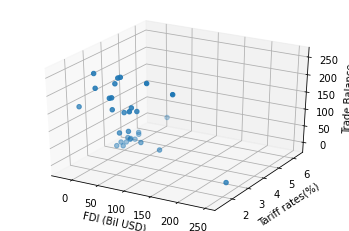

In [44]:
X = np.array(X_multi)
Y = np.array(y_multi)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('FDI (Bil USD)')
ax.set_ylabel('Tariff rates(%)')
ax.set_zlabel('Trade Balance')

In [62]:
# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()





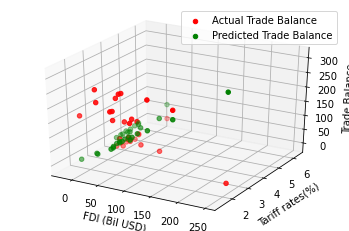

In [63]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual Trade Balance')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted Trade Balance')

ax.set_xlabel('FDI (Bil USD)')
ax.set_ylabel('Tariff rates(%)')
ax.set_zlabel('Trade Balance')
ax.legend()
plt.show()
